## Libraries 

In [57]:
# Dataframe and utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import joblib
import os

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras
from keras import models
from keras.utils import plot_model
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Flatten, Activation 

from ipynb.fs.full.Radar import radar, multi_radar
from ipynb.fs.full.Tools import get_mean, get_attribute, playlist_name, get_attribute2


%matplotlib inline

## File Manager

In [2]:
# File opening

filepath = r'Dataframe\\'

# Rock Data
data = 'MusicData'

# Pop Data
data1 = 'MusicData2'

# Salsa Data
data3 = 'MusicDataNo.1'

In [3]:
# Rock Data

df = pd.read_csv(filepath + data3 +'.csv') 

## Dataframe Information

In [4]:
df.head()

,artist,album,track_name,track_id,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist
0,TOTO,Toto IV,Africa,2374M0fQpWi3dLnB54qaLX,0.257000,0.671,0.373,9,-18.064,1,0.0323,0.000080,0.0481,0.732,92.717,295893,4,"Varias (80s,90s...)"
1,TOTO,Toto,Hold the Line,4aVuWgvD0X63hcOCnZtNFA,0.007830,0.473,0.898,6,-4.797,0,0.0561,0.061800,0.1730,0.808,96.556,235547,4,"Varias (80s,90s...)"
2,TOTO,Toto IV,Rosanna,37BTh5g05cxBIRYMbw8g2T,0.021300,0.384,0.512,7,-13.035,0,0.0358,0.000139,0.2050,0.739,78.442,331200,4,"Varias (80s,90s...)"
3,U2,The Best of 1980-1990 & B-Sides,With Or Without You,2JZfTvWWtpaE8NohqRXqFr,0.000128,0.546,0.485,2,-9.424,1,0.0270,0.318000,0.0939,0.106,109.913,295200,4,"Varias (80s,90s...)"
4,U2,U218 Singles (Deluxe Version),Beautiful Day,0G5F2msfVO77xs7ql2RiTS,0.022500,0.541,0.914,2,-6.727,1,0.0520,0.000441,0.3530,0.449,136.282,245707,4,"Varias (80s,90s...)"


In [5]:
df.tail()

,artist,album,track_name,track_id,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,playlist
1637,Kerri Chandler,Bar A Thym (Supernova Remix Deluxe),Bar A Thym (Original),5sEsABi0eX7MxBQR0uYKaT,0.00045,0.806,0.869,10,-4.553,0,0.0570,0.9080,0.0570,0.7580,125.993,444624,4,Electronic
1638,Jean-Michel Jarre,Oxygène,"Oxygene, Pt. 4",0Tt2jli0yAD1MKSTb5MvS2,0.02340,0.430,0.755,7,-8.457,0,0.0365,0.5910,0.5510,0.6570,188.904,246893,3,Electronic
1639,FC Kahuna,Machine Says Yes,Hayling (feat. Hafdis Huld),58eKLwmiYrJAqNlv96pwlP,0.49500,0.555,0.329,5,-9.188,1,0.0279,0.0154,0.6690,0.0391,140.038,407973,4,Electronic
1640,Hollis P. Monroe,I'M Lonely,I'm Lonely,7iEgoNG4xlbpTxLuMNrBl5,0.00102,0.656,0.864,7,-6.423,1,0.0444,0.7870,0.1580,0.8150,133.305,413120,4,Electronic
1641,DJ Q,Twentyfourseven,Optiumum Thinking,50ti9tKpZpgmT3BCe4Ezi0,0.04850,0.838,0.733,6,-10.467,1,0.0308,0.8670,0.0825,0.5450,127.889,457960,4,Electronic


In [6]:
print("Shape of dataframe: ", df.shape)

Shape of dataframe:  (1642, 18)


In [7]:
# Types of the dataframe

print("   ------ Types ------")
df.dtypes

   ------ Types ------


artist               object
album                object
track_name           object
track_id             object
acousticness        float64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
playlist             object
dtype: object

In [8]:
print('Dataframe Columns: ', df.columns)

Dataframe Columns:  Index(['artist', 'album', 'track_name', 'track_id', 'acousticness',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'playlist'],
      dtype='object')


In [9]:
# Show some statistics about dataset

df.describe()

,acousticness,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1.642000e+03,1642.000000
mean,0.254100,0.640362,0.722691,5.370280,-8.231945,0.528624,0.052914,0.217021,0.182326,0.655139,121.458286,3.158300e+05,3.985384
std,0.263616,0.121946,0.163189,3.573454,3.243697,0.499332,0.037221,0.342261,0.166383,0.261939,26.208380,1.166071e+05,0.138876
min,0.000002,0.166000,0.068300,0.000000,-23.333000,0.000000,0.022300,0.000000,0.023000,0.033600,67.970000,1.416930e+05,3.000000
25%,0.016825,0.564000,0.624000,2.000000,-10.015250,0.000000,0.035500,0.000014,0.079650,0.476000,99.921500,2.464950e+05,4.000000
50%,0.148500,0.652000,0.739000,5.000000,-7.715500,1.000000,0.042900,0.002365,0.116000,0.729500,120.200000,2.883665e+05,4.000000
75%,0.470000,0.728000,0.849000,9.000000,-5.842250,1.000000,0.056200,0.407750,0.235750,0.882000,134.327250,3.552130e+05,4.000000
max,0.994000,0.960000,0.999000,11.000000,1.342000,1.000000,0.578000,0.957000,0.992000,0.980000,204.789000,1.757606e+06,5.000000


## Data Exploration

In [10]:
print("Unique values of Key: \n", df['key'].unique())

Unique values of Key: 
 [ 9  6  7  2  0  1  4  5  8 11 10  3]


In [11]:
print("Unique values of time_signature: \n", df['time_signature'].unique())

Unique values of time_signature: 
 [4 3 5]


### Get each playlist

In [12]:
varias = df.loc[df['playlist'] == 'Varias (80s,90s...)']

In [13]:
salsa = df.loc[df['playlist'] == 'Salsa']

In [14]:
Electronic = df.loc[df['playlist'] == 'Electronic']

## Audio Features 

#### Varias

In [15]:
varias_ = get_attribute(varias)

### Rock

In [16]:
salsa_ = get_attribute(salsa)

### Electronic

In [17]:
electronic_ = get_attribute(Electronic)

### Radar Chart

In [18]:
playlists_names = ['Varias', 'Salsa', 'Electronic']

In [19]:
# Features
r = varias_
r1 = salsa_
r2 = electronic_

In [20]:
# Features column name
imp_features = ['acousticness', 'danceability', 'energy', 'speechiness', 'instrumentalness', 'liveness', 'valence']

categories = imp_features

In [21]:
#radar(df, categories, r1)

In [22]:
multi_radar(categories, r, r1, r2, playlists_names, 'Dis#1')

### Correlation Map

[Text(0.5, 1.0, 'Correlation')]

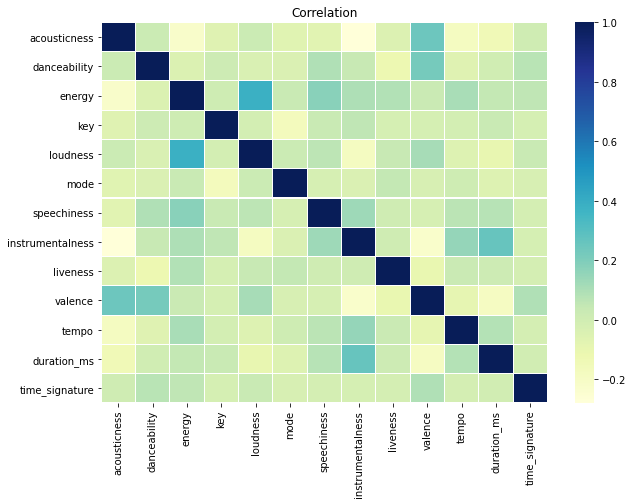

In [23]:
corrmat = df.corr(method='kendall') 
  
f, ax = plt.subplots(figsize =(10,7)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
ax.set(title='Correlation')

### Removing irrelevant columns

In [24]:
# Removing Irrelevant columns 

df.drop(['artist', 'album', 'track_name', 'track_id', 'speechiness', 'duration_ms'], axis=1, inplace=True)

In [25]:
df.head()

,acousticness,danceability,energy,key,loudness,mode,instrumentalness,liveness,valence,tempo,time_signature,playlist
0,0.257000,0.671,0.373,9,-18.064,1,0.000080,0.0481,0.732,92.717,4,"Varias (80s,90s...)"
1,0.007830,0.473,0.898,6,-4.797,0,0.061800,0.1730,0.808,96.556,4,"Varias (80s,90s...)"
2,0.021300,0.384,0.512,7,-13.035,0,0.000139,0.2050,0.739,78.442,4,"Varias (80s,90s...)"
3,0.000128,0.546,0.485,2,-9.424,1,0.318000,0.0939,0.106,109.913,4,"Varias (80s,90s...)"
4,0.022500,0.541,0.914,2,-6.727,1,0.000441,0.3530,0.449,136.282,4,"Varias (80s,90s...)"


#### Varias

In [26]:
varias_2 = get_attribute2(varias)

### Rock

In [27]:
salsa_2 = get_attribute2(salsa)

### Electronic

In [28]:
electronic_2 = get_attribute2(Electronic)

### Radar Chart before after data

In [29]:
# Features column name
new_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']

categories2 = new_features

In [30]:
# Features
r_ = varias_2
r1_ = salsa_2
r2_ = electronic_2

In [31]:
multi_radar(categories2, r_, r1_, r2_, playlists_names, 'Dis#2')

### Encoding Key and time signature

In [32]:
# for dummy variable encoding for key

xs = pd.get_dummies(df, columns=['key', 'time_signature'])

# Removing Y label 

xs.drop(['playlist'], axis=1, inplace=True)


xs.head()

,acousticness,danceability,energy,loudness,mode,instrumentalness,liveness,valence,tempo,key_0,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_3,time_signature_4,time_signature_5
0,0.257000,0.671,0.373,-18.064,1,0.000080,0.0481,0.732,92.717,0,...,0,0,0,0,1,0,0,0,1,0
1,0.007830,0.473,0.898,-4.797,0,0.061800,0.1730,0.808,96.556,0,...,0,1,0,0,0,0,0,0,1,0
2,0.021300,0.384,0.512,-13.035,0,0.000139,0.2050,0.739,78.442,0,...,0,0,1,0,0,0,0,0,1,0
3,0.000128,0.546,0.485,-9.424,1,0.318000,0.0939,0.106,109.913,0,...,0,0,0,0,0,0,0,0,1,0
4,0.022500,0.541,0.914,-6.727,1,0.000441,0.3530,0.449,136.282,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
xs.columns

Index(['acousticness', 'danceability', 'energy', 'loudness', 'mode',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'key_0', 'key_1',
       'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9',
       'key_10', 'key_11', 'time_signature_3', 'time_signature_4',
       'time_signature_5'],
      dtype='object')

### Encoding the playlist dependent variable

In [34]:
genre_list = df.iloc[:, -1]

In [35]:
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

### Dividing data into training and Testing set

In [36]:
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.2)

In [37]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [38]:
print('X Train data shape: ', X_train.shape)
print('X Test data shape: ', X_test.shape)
print('Y Train data shape: ', y_train.shape)
print('Y Test data shape: ', y_test.shape)

X Train data shape:  (1313, 24)
X Test data shape:  (329, 24)
Y Train data shape:  (1313,)
Y Test data shape:  (329,)


In [39]:
X_train.shape[1]

24

## CNN Architecture

In [40]:
# Define the CNN 

NN = models.Sequential(name='Cool CNN')

### Building our Network

In [41]:
# Layers

NN.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

NN.add(layers.Dense(128, activation='relu'))

NN.add(layers.Dense(64, activation='relu'))

In [42]:
#CNN.add(Flatten())

NN.add(layers.Dense(32, activation='relu'))

NN.add(layers.Dense(3, activation='softmax'))

### Compile the Model

In [43]:
NN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(NN.summary())
print('\n\t -------------------- Compiled! --------------------')

Model: "Cool CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               6400      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 49,731
Trainable params: 49,731
Non-trainable params: 0
_________________________________________________________________
None

	 -------------------- Compiled! --------------------


### Training the Model

In [44]:
model_history = NN.fit(X_train, y_train,
                       batch_size = 32,
                       epochs = 100,
                       validation_data=(X_test, y_test),
                       shuffle=True, verbose=1)

Train on 1313 samples, validate on 329 samples
Epoch 1/100
1313/1313 [==============================] - 0s 330us/step - loss: 1.2916 - accuracy: 0.3374 - val_loss: 1.4119 - val_accuracy: 0.3313
Epoch 2/100
1313/1313 [==============================] - 0s 68us/step - loss: 1.2200 - accuracy: 0.3465 - val_loss: 1.0613 - val_accuracy: 0.3465
Epoch 3/100
1313/1313 [==============================] - 0s 74us/step - loss: 1.1222 - accuracy: 0.3953 - val_loss: 1.0470 - val_accuracy: 0.4286
Epoch 4/100
1313/1313 [==============================] - 0s 73us/step - loss: 1.0579 - accuracy: 0.4562 - val_loss: 1.0360 - val_accuracy: 0.4012
Epoch 5/100
1313/1313 [==============================] - 0s 71us/step - loss: 1.0195 - accuracy: 0.5072 - val_loss: 0.9909 - val_accuracy: 0.5562
Epoch 6/100
1313/1313 [==============================] - 0s 77us/step - loss: 0.9866 - accuracy: 0.5050 - val_loss: 1.0987 - val_accuracy: 0.3556
Epoch 7/100
1313/1313 [==============================] - 0s 75us/step - loss

### Analize training history and results

In [45]:
def plot_hist(model_history):
    fix,axs=plt.subplots(2,1,figsize=(20,8))
    ax1 = axs[0]
    ax1.plot(model_history.history['accuracy'])
    ax1.plot(model_history.history['val_accuracy'],c='g')
    ax1.set_title('Model accuracy',fontsize=16)
    ax1.set_ylabel('Accuracy',fontsize=8)
    ax1.set_xlabel('Epoch',fontsize=8)
    ax1.grid(alpha=0.3)
    ax1.legend(['Train', 'Test'], loc='upper left')


    # # summarize history for loss
    ax2 = axs[1]
    ax2.plot(model_history.history['loss'],c='r')
    ax2.plot(model_history.history['val_loss'],c='orange')
    ax2.set_title('Model loss',fontsize=16)
    ax2.set_ylabel('Accuracy',fontsize=8)
    ax2.set_xlabel('Epoch',fontsize=8)
    ax2.grid(alpha=0.3)
    ax2.legend(['train', 'test'], loc='upper right')
    plt.show()

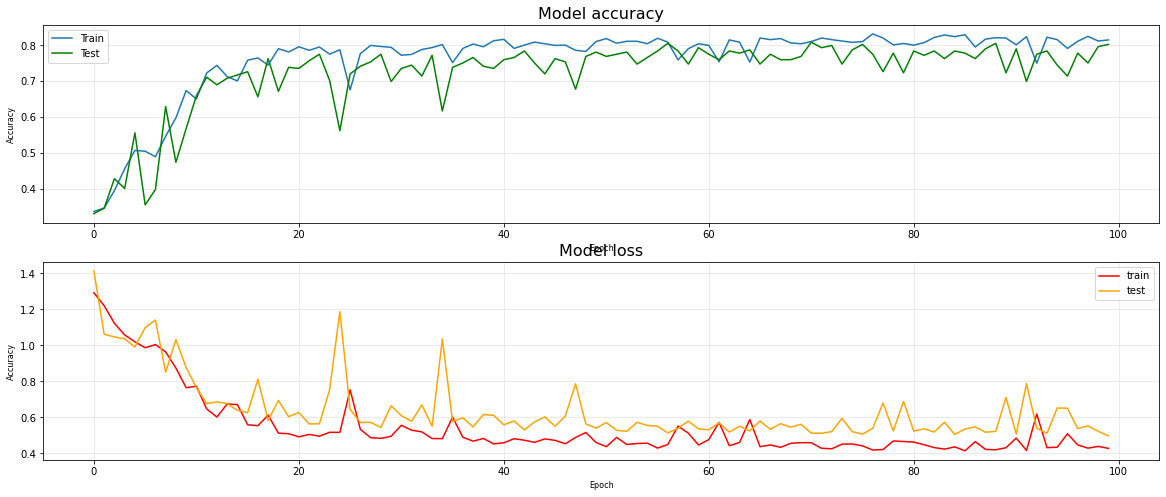

In [46]:
plot_hist(model_history)

In [48]:
test_loss, test_acc = NN.evaluate(X_test, y_test)

print('\nTest accuracy:', test_acc)
print('Test loss:    ', test_loss)

329/329 [==============================] - 0s 27us/step

Test accuracy: 0.802431583404541
Test loss:     0.49727878816946663


In [49]:
# Make prediction.

pred = NN.predict(X_test)

In [84]:
pred[0]

array([0.9819873 , 0.00122442, 0.01678819], dtype=float32)

In [87]:
np.argmax(pred[4])

1

In [88]:
X_test

,acousticness,danceability,energy,loudness,mode,instrumentalness,liveness,valence,tempo,key_0,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_3,time_signature_4,time_signature_5
1211,0.041600,0.610,0.824,-10.394,1.0,0.741000,0.6700,0.3480,147.985,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1217,0.006180,0.650,0.642,-12.880,0.0,0.892000,0.0951,0.2770,120.001,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
925,0.193000,0.516,0.844,-4.369,1.0,0.000134,0.0315,0.9100,160.076,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1582,0.000418,0.609,0.878,-6.809,0.0,0.815000,0.1320,0.0947,129.999,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
800,0.436000,0.548,0.789,-6.383,0.0,0.000164,0.1900,0.9200,179.966,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,0.295000,0.586,0.914,-3.862,0.0,0.000213,0.3330,0.9430,177.824,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
554,0.003090,0.664,0.613,-7.560,1.0,0.000128,0.1750,0.1930,96.600,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
776,0.488000,0.665,0.896,-3.860,0.0,0.000004,0.0471,0.9430,170.917,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49,0.464000,0.621,0.144,-14.201,1.0,0.000000,0.1200,0.2550,91.354,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Save the Model

In [59]:
# save the model to disk
filenames = 'finalized_model_V1.sav'
joblib.dump(NN, filenames)

['finalized_model_V1.sav']

## Load the Model

In [89]:
# load the model from disk
#loaded_model = joblib.load(filenames)
#loss, test_a = loaded_model.evaluate(X_test, y_test)
#print(test_a)

329/329 [==============================] - 0s 121us/step
0.802431583404541
